In [4]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU, LSTM
from keras.models import Sequential, load_model

Using TensorFlow backend.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import matplotlib.style
matplotlib.style.use("ggplot")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
from datetime import datetime

In [9]:
def load_data_df(dataset_dir, separator=',', date_column='date'):
    loaded_df = pd.read_csv(dataset_dir, sep=separator)
    loaded_df.drop_duplicates(subset=date_column, inplace=True)
    loaded_df.dropna(inplace=True)
    return loaded_df



In [10]:
data = load_data_df('../data/BLK.csv', separator=',', date_column='Date' )
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 14:31:00+00:00,333.040,333.310,333.04,333.30,300.0
1,2016-01-04 14:32:00+00:00,332.100,332.100,332.10,332.10,200.0
2,2016-01-04 14:33:00+00:00,331.760,332.735,330.55,330.56,8975.0
3,2016-01-04 14:34:00+00:00,331.000,331.090,330.56,330.56,1089.0
4,2016-01-04 14:35:00+00:00,330.845,331.195,329.58,329.58,3000.0


In [11]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04 14:31:00+00:00,333.040,333.310,333.04,333.30,300.0
1,2016-01-04 14:32:00+00:00,332.100,332.100,332.10,332.10,200.0
2,2016-01-04 14:33:00+00:00,331.760,332.735,330.55,330.56,8975.0
3,2016-01-04 14:34:00+00:00,331.000,331.090,330.56,330.56,1089.0
4,2016-01-04 14:35:00+00:00,330.845,331.195,329.58,329.58,3000.0


In [12]:
# selecting YHOO stocks
# data = prices[prices['symbol']=='YHOO']

# preparing input features
# data = data.drop(['symbol'], axis=1)
data = data.drop(['Volume'], axis=1)
data = data[['Open', 'Low', 'High', 'Close']]

# preparing label data
data_shift = data.shift(-1)
label = data_shift['Close']

# adjusting the shape of both
data.drop(data.index[len(data)-1], axis=0, inplace=True)
label.drop(label.index[len(label)-1], axis=0, inplace=True)

In [13]:
data.shape

(258027, 4)

In [14]:
split_idx = 2200

In [15]:
# conversion to numpy array
X_train, y_train = data.values[:split_idx, :], label.values[:split_idx]
y_train = y_train.reshape(-1, 1)

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

# training data
X_train = x_scale.fit_transform(X_train)
X_train = X_train.reshape((-1,1,4))
y_train = y_scale.fit_transform(y_train)

In [16]:
model_name = 'stock_price_GRU'

model = Sequential()
# TODO ADD LSTM
model.add(LSTM(units=256,
              return_sequences=True,
              input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(LSTM(units=512))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, batch_size=250, epochs=250, validation_split=0.1, verbose=1, shuffle=True)

Train on 1980 samples, validate on 220 samples
Epoch 1/250
1980/1980 [==============================] - 2s 1ms/step - loss: 0.0814 - val_loss: 0.1976
Epoch 2/250
1980/1980 [==============================] - 1s 256us/step - loss: 0.0604 - val_loss: 0.2273
Epoch 3/250
1980/1980 [==============================] - 1s 260us/step - loss: 0.0526 - val_loss: 0.2111
Epoch 4/250
1980/1980 [==============================] - 0s 248us/step - loss: 0.0456 - val_loss: 0.1735
Epoch 5/250
1980/1980 [==============================] - 0s 238us/step - loss: 0.0381 - val_loss: 0.1408
Epoch 6/250
1980/1980 [==============================] - 1s 330us/step - loss: 0.0292 - val_loss: 0.1035
Epoch 7/250
1980/1980 [==============================] - 1s 371us/step - loss: 0.0189 - val_loss: 0.0591
Epoch 8/250
1980/1980 [==============================] - 1s 258us/step - loss: 0.0091 - val_loss: 0.0245
Epoch 9/250
1980/1980 [==============================] - 1s 273us/step - loss: 0.0025 - val_loss: 0.0071
Epoch 10/2

In [22]:
# test data
X_test = data.values[split_idx:, :]

X_test = x_scale.transform(X_test)
X_test = X_test.reshape((-1,1,4))

In [23]:
X_test.shape

(363, 1, 4)

In [24]:
y_test = label.values[split_idx:].reshape(-1, 1)
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

363/363 [==============================] - 0s 70us/step
Score: 370757.2343319559


In [25]:
model.predict(X_train)

# predict
yhat = model.predict(X_test)
yhat = np.array(yhat).reshape(-1, 1)
yhat = y_scale.inverse_transform(yhat)

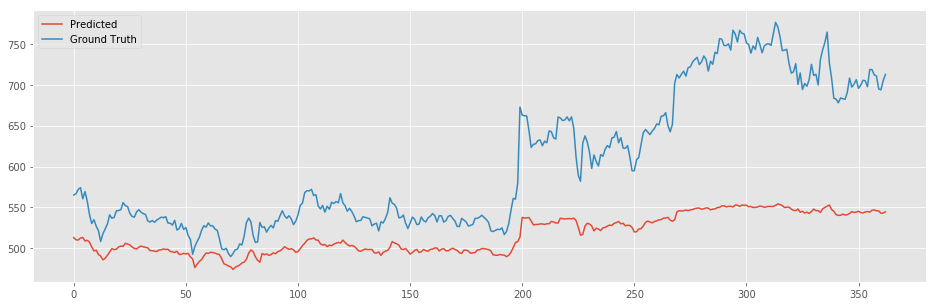

In [35]:
# plot
plt.figure(figsize=(16, 5))
plt.plot(yhat, label='Predicted')
plt.plot(y_test, label='Ground Truth')
plt.legend();

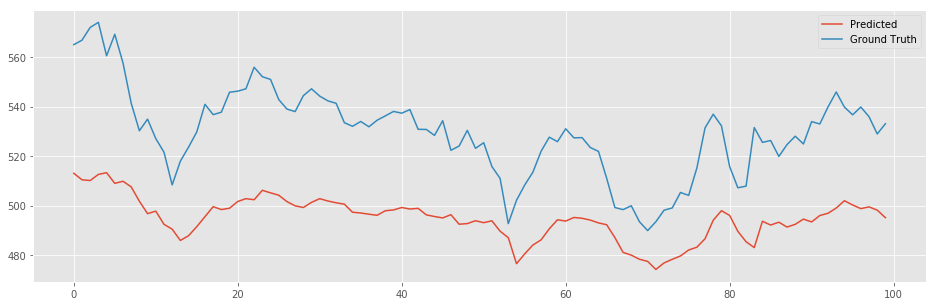

In [34]:
plt.figure(figsize=(16, 5))
plt.plot(yhat[:100], label='Predicted')
plt.plot(y_test[:100], label='Ground Truth')
plt.legend();